In [1]:
!date

Tue 20 Dec 2022 12:52:40 PM PST


In [2]:
!echo $CONDA_PREFIX

/home/derek/miniconda3/envs/scFates


In [3]:
import warnings
import matplotlib
#warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf

import matplotlib.pyplot as plt
# sc.settings.verbosity = 1
# sc.settings.logfile = sys.stdout
import seaborn



In [4]:
warnings.filterwarnings(action="ignore", 
                        message="findfont")

In [5]:
adata = sc.read_h5ad('./scANVI_label.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 74327 × 36385
    obs: 'n_counts', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_mito', '_scvi_batch', '_scvi_labels', 'leiden', 'scANVI_simple', 'tech', 'C_scANVI', 'C_scANVI_simple'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'C_scANVI_simple_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

/home/derek/miniconda3/envs/scFates/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


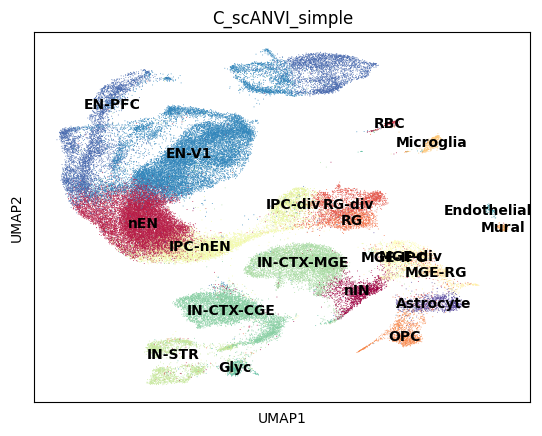

In [7]:
sc.pl.umap(adata,color='C_scANVI_simple',legend_loc='on data')

In [8]:
sc.tl.leiden(adata,key_added='leiden_coarse',
            resolution=.2)

/home/derek/miniconda3/envs/scFates/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


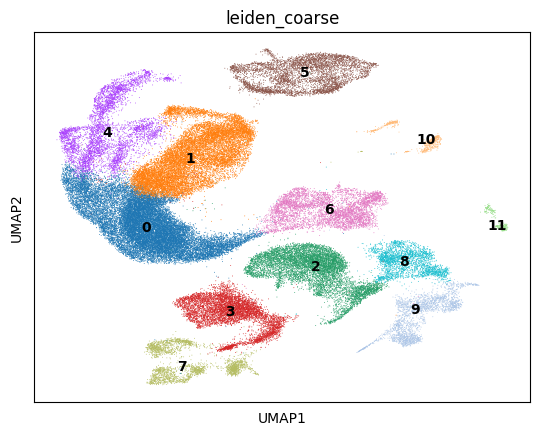

In [9]:
sc.pl.umap(adata,color='leiden_coarse',legend_loc='on data')

In [10]:
adata_lineage = adata[adata.obs.leiden_coarse.isin(['0','1','4','5','6'])].copy()
#adata_lineage = adata[adata.obs.leiden_coarse.isin(['2','8','9'])].copy()

/home/derek/miniconda3/envs/scFates/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


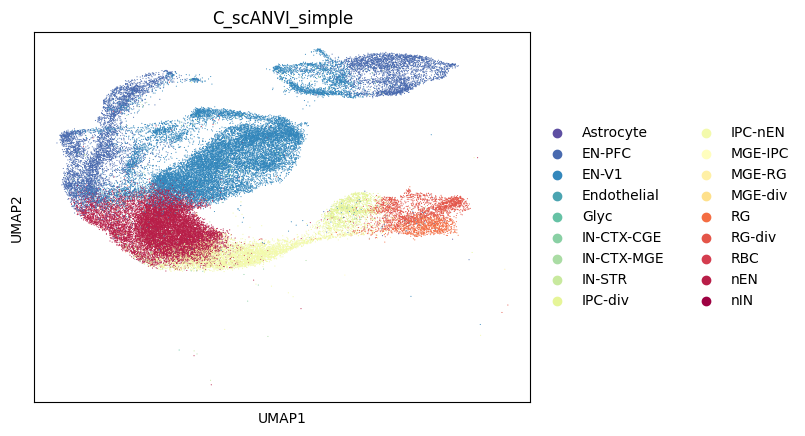

In [11]:
sc.pl.umap(adata_lineage,color='C_scANVI_simple')

In [12]:
scf.tl.tree(adata_lineage,
            method="ppt",
            Nodes=200,
            use_rep="X_umap",
            device="cpu",
            seed=1,
            ppt_lambda=100,
            ppt_sigma=1.1,
            ppt_nsteps=200
           )

inferring a principal tree --> parameters used 
    200 principal points, sigma = 1.1, lambda = 100, metric = euclidean
    fitting:  36%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                             | 73/200 [00:16<00:28,  4.51it/s]
    converged
    finished (0:00:16) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


/home/derek/miniconda3/envs/scFates/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


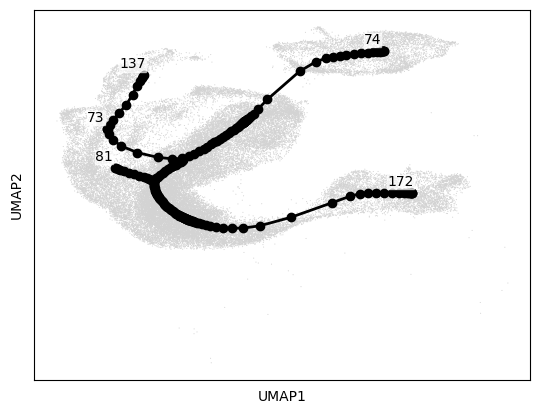

In [13]:
%matplotlib inline
scf.pl.graph(adata_lineage,
             tips=True,
             forks=False
            )

In [14]:
scf.tl.root(adata_lineage,172)


node 172 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [18]:
#remove nan milstones
adata_lineage = adata_lineage[~adata_lineage.obs.milestones.isna()]  

In [ ]:
scf.tl.pseudotime(adata_lineage,n_jobs=10,
                  n_map=100,
                  seed=42)

projecting cells onto the principal graph
    mappings:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 90/100 [04:04<00:27,  2.71s/it]

In [ ]:
adata_lineage.uns['pseudotime_list']['0']['t'].index.name = None

In [ ]:
adata_lineage.obs['scFates_pseudotime'] = adata_lineage.uns['pseudotime_list']['0']['t']

In [ ]:
sc.pl.umap(adata_lineage,
           color='scFates_pseudotime',
           size=5,
           cmap='RdYlBu',
           sort_order=False
          )

In [35]:
adata.obs['scFates_pseudotime'] = adata_lineage.obs['scFates_pseudotime']

In [36]:
adata.obs['scFates_pseudotime']

alt_obs_names
AAACCCAAGAACCGCA-GW16_1     9.682677
AAACCCAAGCAACAGC-GW16_1    21.540639
AAACCCAAGCCTGGAA-GW16_1          NaN
AAACCCACAAACCACT-GW16_1    10.094357
AAACCCACACCAGCCA-GW16_1     4.166829
                             ...    
TTTGTTGTCCGTAGTA-GW23_1          NaN
TTTGTTGTCCTGTTGC-GW23_1    19.266874
TTTGTTGTCTCAAAGC-GW23_1    19.311364
TTTGTTGTCTGTAAGC-GW23_1    21.570397
TTTGTTGTCTTACCAT-GW23_1          NaN
Name: scFates_pseudotime, Length: 75666, dtype: float64

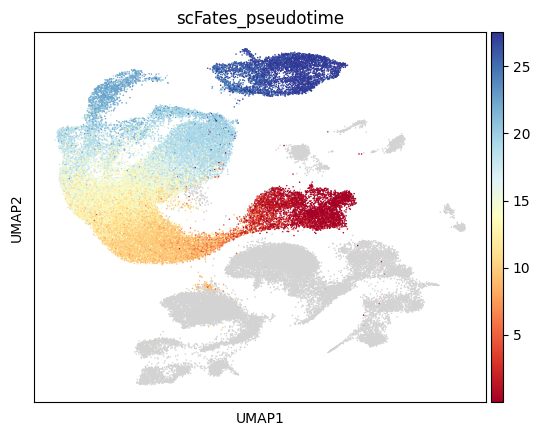

In [37]:
sc.pl.umap(adata,
           color='scFates_pseudotime',
           size=5,
           cmap='RdYlBu',
           sort_order=False
          )

In [38]:
adata.write_h5ad('SCVI_pseudotime.h5ad')

In [40]:
adata.obs.to_csv('SCVI_pseudotime_annotations.csv')

In [41]:
!conda list

# packages in environment at /home/derek/miniconda3/envs/scFates:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
_r-mutex                  1.0.1               anacondar_1    conda-forge
adjusttext                0.7.3                    pypi_0    pypi
anndata                   0.8.0                    pypi_0    pypi
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3    conda-forge
asttokens                 2.1.0              pyhd8ed1ab_0    conda-forge
attrs                     22.1.0             pyh71513ae_1    conda-forge
babel                     2.11.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
bac